# Bike Share Analysis
## Google Data Analytics Certification's Capstone Project

### The scenario - 
- Divvy, a bike-share company in Chicago has two types of users
    - casual riders (single ride/ day pass holders)
    - member rider (annual membership holders)
    
    
- The company believes that the key to increasing its profits lies in converting more casual riders to annual riders
- The marketing team plans to launch a targeted campaign comprising of new offers/ packages to achieve the same
- To do so effectively, it is crucial to first, understand the usage trends of both groups in more depth

#### I went ahead and did some preliminary analysis of the company's existing user plans from its [website](https://divvybikes.com/pricing) - 
#### For single rides - 
| Single Pass | Classic Bike | E-Bike | Scooter |
| :-: | :-: | :-: | :-: |
| **Unlock** | \$1 | \$1 | \$1 |
| **Per Min** | \$0.16 | \$0.39 | \$0.39 |

#### For day pass holders, at a one-time cost of \$15 -
| Day Pass | All Bikes |
| :-: | :-: |
| **Unlock** | \$15 |
| **Per Min** | \$0.16 beyond 3 hours on one bike |


#### For members, at a monthly cost of \$9.92 -
| Single Pass | Classic Bike | E-Bike | Scooter |
| :-: | :-: | :-: | :-: |
| **Unlock** | \$1 | \$1 | \$1 |
| **Per Min** | \$0.16 beyond 45 mins on one bike | \$0.16 | \$0.25 |

#### Placing ourselves in the shoes of the marketing team for a moment, what kind of insights would be relevant to the campaign's launch?
The 'when', 'where' and 'how' would play an important role
- When to launch the new campaign?
    - Month-wise usage trends of both types of riders would show when user frequency peaks during the year
    - The campaign can then be launched in the months leading up to and during the busy season
    
    
- Where to advertise the new offers?
    - The most popular start stations through the year would reach the most number of eyeballs
    - This will help in lowering the cost per click
    
    
- How to reach the customers who are most likely to make the switch?
    - Based on the existing user plans, customers who repeatedly spend more than \$9.92 in a month would definitely benefit from the annual membership
    - Targeting the most popular start stations with high average ride costs would help reach such customers 
    
*(I chose start stations rather than end stations because a customer is more likely to spend more time at a start station looking for a bike, unlocking it from the app and then setting off as compared to at an end station where customers are more likely to drop off their bikes in a hurry)*

### Package Imports:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## DATA ACQUISITION
### Importing all .csv files for the year 2021, containing each month's ride share data:

In [2]:
df = pd.read_csv(r'E:\Data Analytics\Projects\Google Certificate Capstone\Project 1- Cyclistic Bike Share\2021 Data\202101-divvy-tripdata.csv')
df_2 = pd.read_csv(r'E:\Data Analytics\Projects\Google Certificate Capstone\Project 1- Cyclistic Bike Share\2021 Data\202102-divvy-tripdata.csv')
df_3 = pd.read_csv(r'E:\Data Analytics\Projects\Google Certificate Capstone\Project 1- Cyclistic Bike Share\2021 Data\202103-divvy-tripdata.csv')
df_4 = pd.read_csv(r'E:\Data Analytics\Projects\Google Certificate Capstone\Project 1- Cyclistic Bike Share\2021 Data\202104-divvy-tripdata.csv')
df_5 = pd.read_csv(r'E:\Data Analytics\Projects\Google Certificate Capstone\Project 1- Cyclistic Bike Share\2021 Data\202105-divvy-tripdata.csv')
df_6 = pd.read_csv(r'E:\Data Analytics\Projects\Google Certificate Capstone\Project 1- Cyclistic Bike Share\2021 Data\202106-divvy-tripdata.csv')
df_7 = pd.read_csv(r'E:\Data Analytics\Projects\Google Certificate Capstone\Project 1- Cyclistic Bike Share\2021 Data\202107-divvy-tripdata.csv')
df_8 = pd.read_csv(r'E:\Data Analytics\Projects\Google Certificate Capstone\Project 1- Cyclistic Bike Share\2021 Data\202108-divvy-tripdata.csv')
df_9 = pd.read_csv(r'E:\Data Analytics\Projects\Google Certificate Capstone\Project 1- Cyclistic Bike Share\2021 Data\202109-divvy-tripdata.csv')
df_10 = pd.read_csv(r'E:\Data Analytics\Projects\Google Certificate Capstone\Project 1- Cyclistic Bike Share\2021 Data\202110-divvy-tripdata.csv')
df_11 = pd.read_csv(r'E:\Data Analytics\Projects\Google Certificate Capstone\Project 1- Cyclistic Bike Share\2021 Data\202111-divvy-tripdata.csv')
df_12 = pd.read_csv(r'E:\Data Analytics\Projects\Google Certificate Capstone\Project 1- Cyclistic Bike Share\2021 Data\202112-divvy-tripdata.csv')


### Concatenating them together to create a data frame for the entire year:

In [3]:
df = pd.concat([df, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12], axis=0)


### Preview to check the fields and the date range for the first five records:

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


As each ride contains a unique ride ID rather than each user being assigned a unique user ID it is not possible to track an individual's usage patterns

### Ensuring the last five records belong to the month of December:

In [5]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member
247539,37AC57E34B2E7E97,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,Michigan Ave & Jackson Blvd,TA1309000002,Dearborn St & Monroe St,TA1305000006,41.877850,-87.624080,41.881320,-87.629521,member


 *We can already see a few NaN values showing up in the columns related to start and end stations, we will deal with these during the data cleaning process*

### Investigating the dimensions of the raw data frame:

In [6]:
shape = df.shape
print(shape)

(5595063, 13)


 ## DATA CLEANING
 
 ### Since the data frame's preview showed NaN values, we shall dig deeper and identify their occurrences:

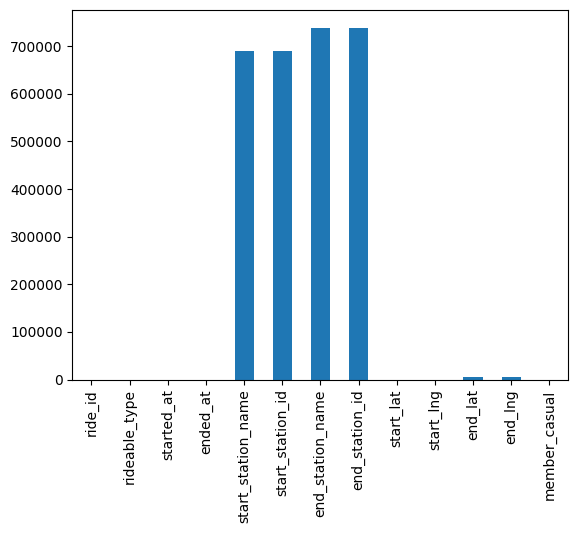

In [7]:
df.isnull().sum().plot.bar()
plt.show()

 As this dataset was provided as part of the certification course, there's no other data source I can cross-reference to retrieve the missing values.
 
 
 I cannot replace them with any central tendency measures either as these fields contain nominal data.
 
 
 The best course of action would be to drop entire rows containing these NaNs:

In [8]:
df.dropna(subset=["start_station_id","start_station_name", "end_station_id", "end_lat"], axis=0, inplace = True)

This looks much better, no null values anywhere in the data frame:

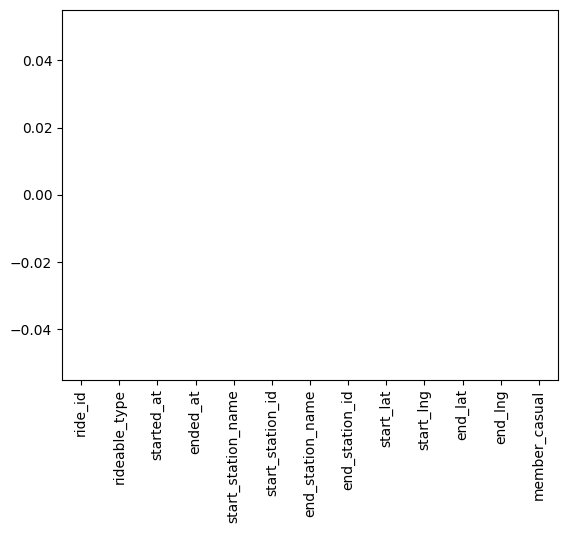

In [9]:
df.isnull().sum().plot.bar()
plt.show()

Wow, we dropped over a million records!

In [10]:
shape = df.shape
print(shape)

(4588302, 13)


### Each ride's duration would be a useful metric to assess trends in users' behaviours:

In [11]:
df["started_at"] = df["started_at"].astype("datetime64[ns]")
df["ended_at"] = df["ended_at"].astype("datetime64[ns]")

In [12]:
df['duration'] = abs(df['ended_at'] - df['started_at']).dt.total_seconds()
df.duration.abs()

9         433.0
10        272.0
11        587.0
12        537.0
13        609.0
          ...  
247528    280.0
247532    266.0
247536    421.0
247537    497.0
247539    217.0
Name: duration, Length: 4588302, dtype: float64

*I have calculated absolute values to account for rides that lasted beyond midnight which would result in a negative duration value*

### Let's look at the distribution of ride duration values:

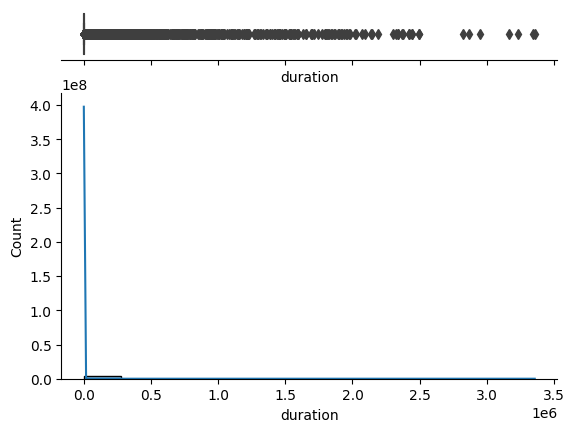

In [13]:
x = df['duration']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='count', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Looks like there are plenty of outliers skewing the data. Let's look into this.

In [14]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df['duration'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95])

count   4588302
mean       1309
std       11065
min           0
1%           40
10%         250
20%         363
30%         472
40%         592
50%         732
60%         911
70%        1158
80%        1543
90%        2313
95%        3471
max     3356649
Name: duration, dtype: float64

I'm finding it hard to believe someone rented a bike for 3,356,649 seconds! Of course, this is erroneous but out of curiosity, let's check this out.

In [15]:
df[df['duration']==df['duration'].max()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
595683,F043F0F6A1AA4F85,docked_bike,2021-06-05 02:27:26,2021-07-13 22:51:35,Michigan Ave & Lake St,TA1305000011,Malcolm X College Vaccination Site,631,42,-88,42,-88,casual,3356649


Haha, there's no way someone rented the same bike for over a month!

### Since 95% of the data lies between 0 - 3471 seconds, let's eliminate the outliers greater than 3471 seconds and rides that lasted 0 seconds:

In [16]:
df.drop(df[df.duration > 3471].index, inplace=True)
df.drop(df[df.duration == 0].index, inplace=True)

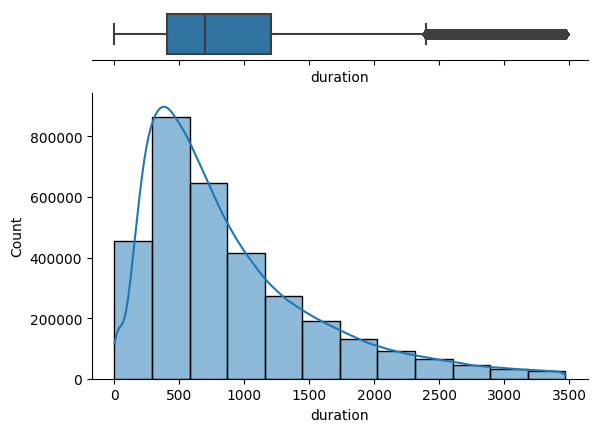

In [17]:
x = df['duration']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='count', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [18]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df['duration'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95])

count   3238938
mean        900
std         678
min           1
1%           38
10%         245
20%         354
30%         459
40%         571
50%         700
60%         857
70%        1066
80%        1372
90%        1877
95%        2353
max        3471
Name: duration, dtype: float64

The standard deviation went down from 11065 to 678. 

Now, the distribution is a more realistic representation of user behaviour.

In [19]:
shape = df.shape
print(shape)

(3238938, 14)


### Let's extract the month from each date stamp to analyze usage patterns through the year:

In [20]:
df["month"] = df["started_at"].dt.strftime('%b')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,month
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,42,-88,42,-88,member,433,Jan
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,42,-88,42,-88,casual,537,Jan
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,42,-88,42,-88,casual,609,Jan
15,0FEED5C2C8749A1C,classic_bike,2021-01-05 10:33:12,2021-01-05 10:39:12,California Ave & Cortez St,17660,Sacramento Blvd & Franklin Blvd,KA1504000113,42,-88,42,-88,member,360,Jan
16,E276FD43BDED6420,classic_bike,2021-01-30 11:59:16,2021-01-30 12:03:44,California Ave & Cortez St,17660,Western Ave & Walton St,KA1504000103,42,-88,42,-88,member,268,Jan


### To ensure consequent plots have data sorted in the correct sequence of months, let's create an index variable for each month and fix the order:


In [21]:
final = df
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
final.index=pd.CategoricalIndex(final['month'],categories=sort_order,ordered=True)
final=final.sort_index().reset_index(drop=True)
df.drop("month", axis = 1, inplace=True)

In [22]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
month,,,,,,,,,,,,,,
Jan,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,42,-88,42,-88,member,433
Jan,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,42,-88,42,-88,casual,537
Jan,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,42,-88,42,-88,casual,609
Jan,0FEED5C2C8749A1C,classic_bike,2021-01-05 10:33:12,2021-01-05 10:39:12,California Ave & Cortez St,17660,Sacramento Blvd & Franklin Blvd,KA1504000113,42,-88,42,-88,member,360
Jan,E276FD43BDED6420,classic_bike,2021-01-30 11:59:16,2021-01-30 12:03:44,California Ave & Cortez St,17660,Western Ave & Walton St,KA1504000103,42,-88,42,-88,member,268


In [23]:
df.tail(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
month,,,,,,,,,,,,,,
Dec,073BDECDD8CEEB7F,classic_bike,2021-12-06 17:51:27,2021-12-06 17:54:43,Wells St & Huron St,TA1306000012,Wells St & Walton St,TA1306000011,42,-88,42,-88,casual,196
Dec,E06135F650553F21,electric_bike,2021-12-07 15:55:37,2021-12-07 16:00:17,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,42,-88,42,-88,casual,280
Dec,8DF0DBB049906332,electric_bike,2021-12-01 16:50:52,2021-12-01 16:55:18,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,42,-88,42,-88,casual,266
Dec,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,42,-88,42,-88,member,497
Dec,37AC57E34B2E7E97,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,Michigan Ave & Jackson Blvd,TA1309000002,Dearborn St & Monroe St,TA1305000006,42,-88,42,-88,member,217


## DATA EXPLORATION

### As pricing plans vary based on the duration of a ride, let's identify periods of the year during which users rent bikes for longer durations:

In [24]:
x = (df.groupby(['month', 'member_casual']).duration.mean())
print(x)

month  member_casual
Jan    casual           937
       member           693
Feb    casual          1102
       member           780
Mar    casual          1199
       member           773
Apr    casual          1178
       member           795
May    casual          1207
       member           804
Jun    casual          1150
       member           800
Jul    casual          1120
       member           781
Aug    casual          1091
       member           769
Sep    casual          1064
       member           744
Oct    casual          1008
       member           685
Nov    casual           887
       member           626
Dec    casual           865
       member           611
Name: duration, dtype: float64


A line plot would make this table a lot easier to interpret.

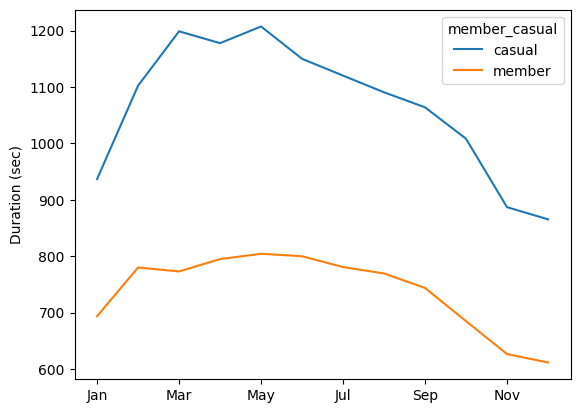

In [36]:
x.unstack().plot()
plt.xticks(rotation=0)
plt.ylabel("Duration (sec)")
plt.xlabel("")
plt.show()

Members' usage exhibits a narrower range of 600 - 800 seconds approximately. This is probably because members use the bike rental service to get from home to work or to run errands.

Casual users on the other hand rent bikes for any period between 900 - 1200 seconds; if I were to speculate I'd think it's because they were using the service to explore the city rather than just get from point A to point B.

### Let's determine the best time of year to launch the campaign:

In [26]:
y = (df.groupby('month')['member_casual'].value_counts())
print(y)

month  member_casual
Jan    member            42928
       casual             8661
Feb    member            22316
       casual             5074
Mar    member            86663
       casual            44425
Apr    member           125088
       casual            73652
May    member           171151
       casual           139182
Jun    member           232135
       casual           208068
Jul    casual           262259
       member           249129
Aug    member           259036
       casual           242289
Sep    member           245312
       casual           203084
Oct    member           209596
       casual           128081
Nov    member           123663
       casual            44491
Dec    member            84930
       casual            27725
Name: member_casual, dtype: int64


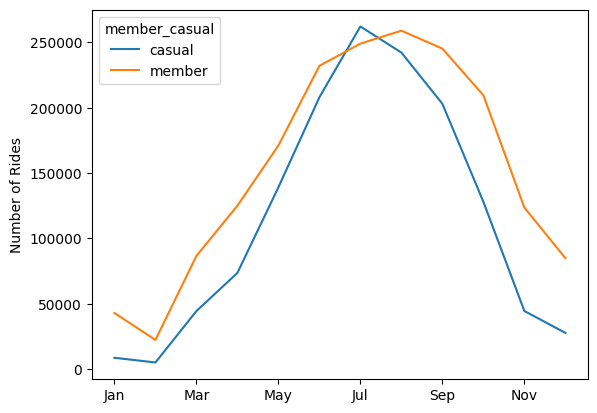

In [27]:
y.unstack().plot()
plt.xticks(rotation=0)
plt.ylabel("Number of Rides")
plt.xlabel("")
plt.show()

Unsurprisingly, as this servce is based in Boston, the winter months show low activity levels while usage picks up during the warmer months. 

Launching the campaign in April for a duration of 5 months would be ideal to maximize its reach, specifically for casual users.

### Let's find the busiest start stations through the year for both types of users as well as for casual users only:

In [28]:
pd.set_option('display.max_rows', len(df))
df.groupby('month')['start_station_name'].value_counts().groupby(level=0, group_keys=False).head(10)

month  start_station_name                
Jan    Clark St & Elm St                       583
       Dearborn St & Erie St                   516
       Wells St & Huron St                     502
       Kingsbury St & Kinzie St                490
       St. Clair St & Erie St                  476
       Columbus Dr & Randolph St               435
       Wells St & Elm St                       430
       Wells St & Concord Ln                   393
       Desplaines St & Kinzie St               390
       Clark St & Schiller St                  370
Feb    Clark St & Elm St                       318
       St. Clair St & Erie St                  282
       Dearborn St & Erie St                   277
       Wells St & Elm St                       255
       Columbus Dr & Randolph St               252
       Kingsbury St & Kinzie St                238
       Broadway & Waveland Ave                 230
       Clinton St & Madison St                 223
       Wells St & Hubbard St            

Since the marketing campaign aims to reach casual users mainly, I have filtered the members out to obtain the busiest stations for casual riders only.

In [29]:
df_1 = df[df['member_casual'] == "casual"]
pd.set_option('display.max_rows', len(df_1))
df_1.groupby('month')['start_station_name'].value_counts().groupby(level=0, group_keys=False).head(10)

month  start_station_name                
Jan    Lake Shore Dr & Monroe St               94
       Wells St & Huron St                     90
       Wells St & Elm St                       84
       Clark St & Elm St                       81
       Wells St & Evergreen Ave                73
       Ellis Ave & 60th St                     66
       Michigan Ave & 8th St                   66
       Daley Center Plaza                      65
       Wells St & Concord Ln                   64
       Clark St & Grace St                     63
Feb    Lake Shore Dr & Monroe St               62
       Shedd Aquarium                          57
       Millennium Park                         53
       Clark St & Elm St                       51
       Kingsbury St & Kinzie St                48
       Streeter Dr & Grand Ave                 45
       Wells St & Elm St                       45
       Wabash Ave & Grand Ave                  41
       Ashland Ave & Division St               39
       D

Everything looks good thus far, let's export the data frame to build a visualization on Tableau.

In [30]:
df.to_csv('Python_Clean_Data.csv', index=True)

Here's the link to the Tableau dashboard- [Bike Share Visualization](https://public.tableau.com/views/BikeShareAnalysis_16711166827110/BikeShareAnalysis?:language=en-US&:display_count=n&:origin=viz_share_link)
